In [ ]:
### Fire vegetation model

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [586]:
size = 20
V = np.random.rand(size,size)*0.2+0.8
H = np.zeros((size,size))
H[0,0] =1

a = 0.1 #Vegetation growth
b = 1.2 #Fire start senseitivity
c = 0.3 #Combustion rate
d = 0.4 #Fire decay
s = 0.01 #Noise scale
t = 0.1

#
def vegrowth(array,a,b,c,d,s,t):
    return (np.clip(array + a*(1-array)*t + np.random.normal(0,s,(size,size)),0,1))
def averageheat(array):
    north = np.roll(array, 1, axis=0)
    south = np.roll(array, -1, axis=0)
    east = np.roll(array, 1, axis=1)
    west = np.roll(array, -1, axis=1)

    # Diagonal neighbors (weight = 1/sqrt(2))
    northeast = np.roll(north, 1, axis=1) * (1 / np.sqrt(2))
    northwest = np.roll(north, -1, axis=1) * (1 / np.sqrt(2))
    southeast = np.roll(south, 1, axis=1) * (1 / np.sqrt(2))
    southwest = np.roll(south, -1, axis=1) * (1 / np.sqrt(2))

    # Combine contributions and normalize
    adjacent = north + south + east + west
    diagonal = northeast + northwest + southeast + southwest
    weights = 4 + 4 * (1 / np.sqrt(2))  # ~6.828

    neighborheat = (adjacent + diagonal) / weights
    #print(neighborheat)
    return neighborheat
def firespread(array,vegarray,a,b,c,d,s,t):
    return (np.clip(array + b*(averageheat(array)*vegarray)*t -d*array*t+ np.random.normal(0,s,(size,size)),0,1))
def fireconsume(array,heatarray,a,b,c,d,s,t):
    return (np.clip(array - c*heatarray*t,0,1))

    


In [97]:
test =np.array([[0,0,0],[0,0.5,0.5],[0,0,0]])
test

array([[0. , 0. , 0. ],
       [0. , 0.5, 0.5],
       [0. , 0. , 0. ]])

In [98]:
#test= np.ones((3,3))+np.identity(3)-np.identity(2)
averageheat(test)

array([[0.10355339, 0.125     , 0.125     ],
       [0.14644661, 0.0732233 , 0.0732233 ],
       [0.10355339, 0.125     , 0.125     ]])

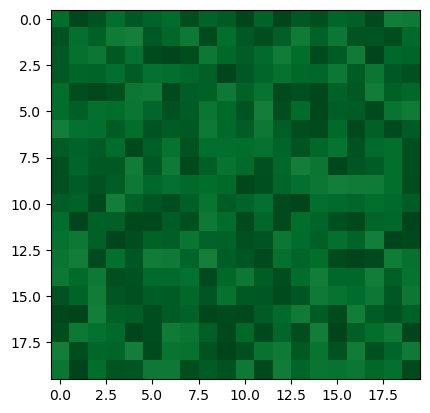

In [69]:
plt.imshow(V, cmap = "Greens", vmin=0,vmax=1)

0.8893834199420843
0.025918660888321635
0.015073224258603777
0.8497515112823136
0.024835728235706817
0.014090880495714412
0.816097771184965
0.022697545552587003
0.03347927538575402
0.7676990718115695
0.02537132738078475
0.03603910900364503
0.7411610383162495
0.022927080042950722
0.038387006753174864


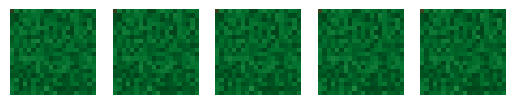

In [146]:
Vnew = vegrowth(V)
Hnew = firespread(H,Vnew)


for i in range(5):
    Vnew = vegrowth(Vnew)
    Hnew = firespread(Hnew,Vnew)
    print(Hnew[0,0])
    print(Hnew[1,0])
    print(Hnew[1,1])
    plt.subplot(1,5,i+1)
    plt.imshow(Vnew, cmap = "Greens", vmin=0,vmax=1)
    plt.imshow(Hnew,cmap="Reds", alpha=0.3*(Hnew>0.2), vmin=0,vmax=1)
    plt.axis('off')
plt.show()


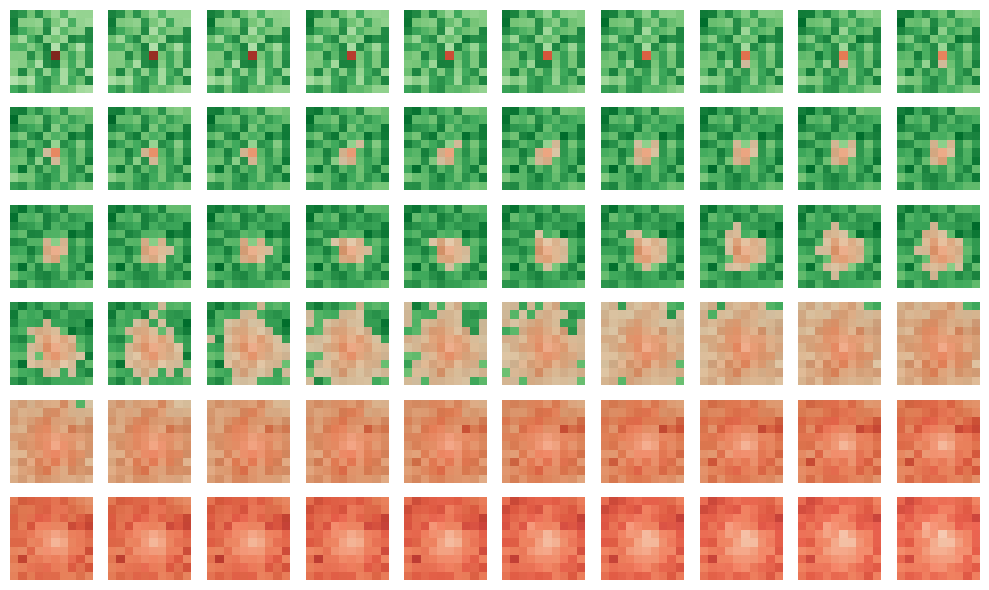

In [252]:
size = 10
a = 0.1 #Vegetation growth
b = 1.2 #Fire start senseitivity
c = 0.3 #Combustion rate
d = 0.4 #Fire decay
s = 0.01 #Noise scale
t = 0.2

V = np.random.rand(size, size)*0.5+0.3  # Vegetation
H = np.zeros((size, size))      # Heat
H[int(size/2), int(size/2)] = 1.0  # Initial fire

fig, axs = plt.subplots(6, 10, figsize=(10, 6))  # Explicit axes objects

for i in range(60):
    # Update vegetation and heat
    V = vegrowth(V)
    H = firespread(H, V)
    V = fireconsume(V,H)
    
    # Select subplot axis
    row = i // 10
    col = i % 10
    ax = axs[row, col]
    
    # Plot vegetation (green)
    ax.imshow(V, cmap="Greens", vmin=0, vmax=1)
    
    # Plot heat (red) with *current* H-dependent alpha
    ax.imshow(H, cmap="Reds", alpha=0.8*(H > 0.2), vmin=0, vmax=1)
    
    ax.axis('off')

plt.tight_layout()
plt.show()

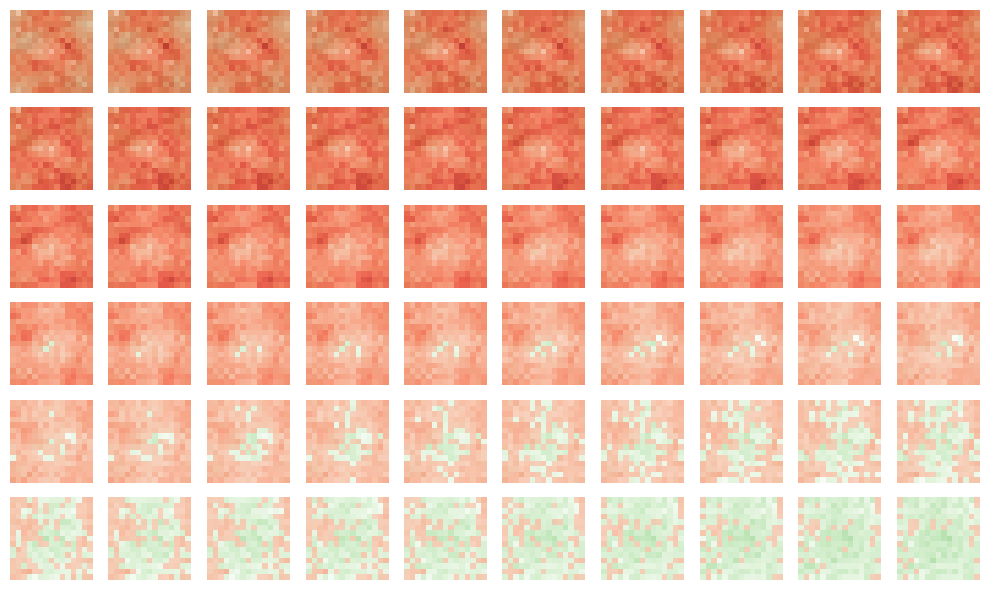

In [250]:
fig, axs = plt.subplots(6, 10, figsize=(10, 6))  # Explicit axes objects

for i in range(60):
    # Update vegetation and heat
    V = vegrowth(V)
    H = firespread(H, V)
    V = fireconsume(V,H)
    
    # Select subplot axis
    row = i // 10
    col = i % 10
    ax = axs[row, col]
    
    # Plot vegetation (green)
    ax.imshow(V, cmap="Greens", vmin=0, vmax=1)
    
    # Plot heat (red) with *current* H-dependent alpha
    ax.imshow(H, cmap="Reds", alpha=0.8*(H > 0.2), vmin=0, vmax=1)
    
    ax.axis('off')

plt.tight_layout()
plt.show()

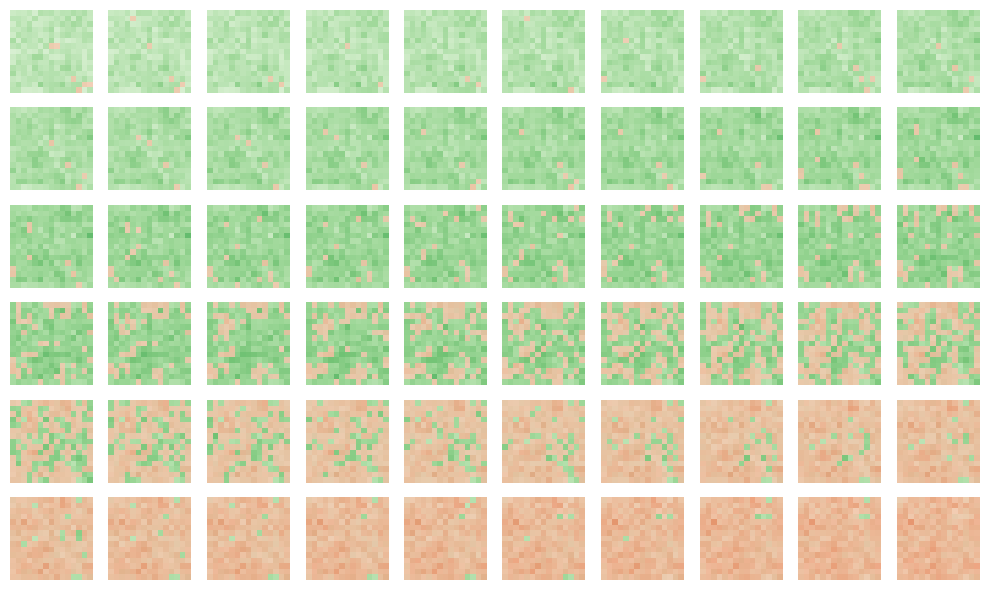

In [248]:
fig, axs = plt.subplots(6, 10, figsize=(10, 6))  # Explicit axes objects

for i in range(60):
    # Update vegetation and heat
    V = vegrowth(V)
    H = firespread(H, V)
    V = fireconsume(V,H)
    
    # Select subplot axis
    row = i // 10
    col = i % 10
    ax = axs[row, col]
    
    # Plot vegetation (green)
    ax.imshow(V, cmap="Greens", vmin=0, vmax=1)
    
    # Plot heat (red) with *current* H-dependent alpha
    ax.imshow(H, cmap="Reds", alpha=0.8*(H > 0.2), vmin=0, vmax=1)
    
    ax.axis('off')

plt.tight_layout()
plt.show()

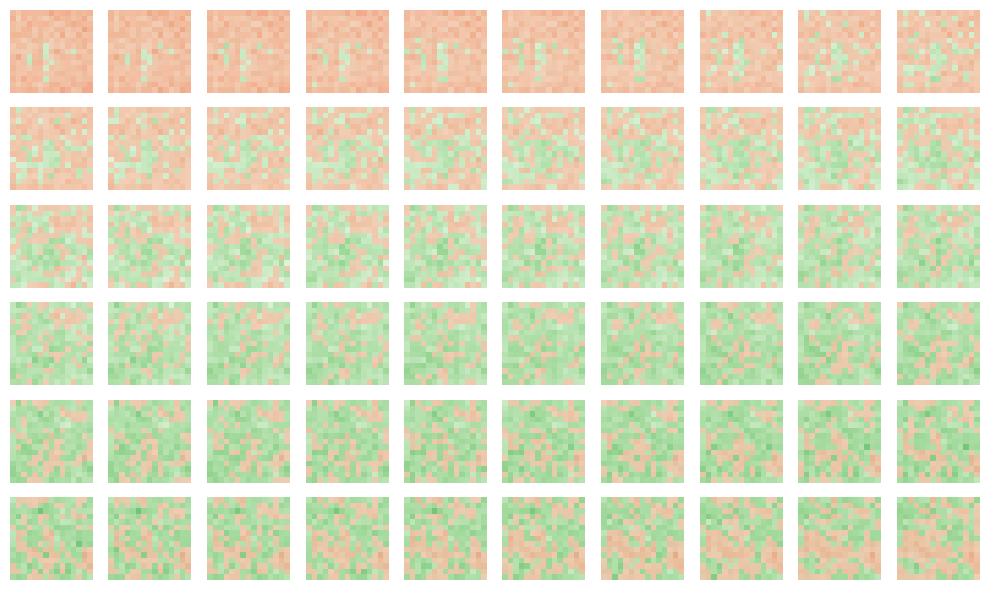

In [244]:
fig, axs = plt.subplots(6, 10, figsize=(10, 6))  # Explicit axes objects

for i in range(60):
    # Update vegetation and heat
    V = vegrowth(V)
    H = firespread(H, V)
    V = fireconsume(V,H)
    
    # Select subplot axis
    row = i // 10
    col = i % 10
    ax = axs[row, col]
    
    # Plot vegetation (green)
    ax.imshow(V, cmap="Greens", vmin=0, vmax=1)
    
    # Plot heat (red) with *current* H-dependent alpha
    ax.imshow(H, cmap="Reds", alpha=0.8*(H > 0.2), vmin=0, vmax=1)
    
    ax.axis('off')

plt.tight_layout()
plt.show()

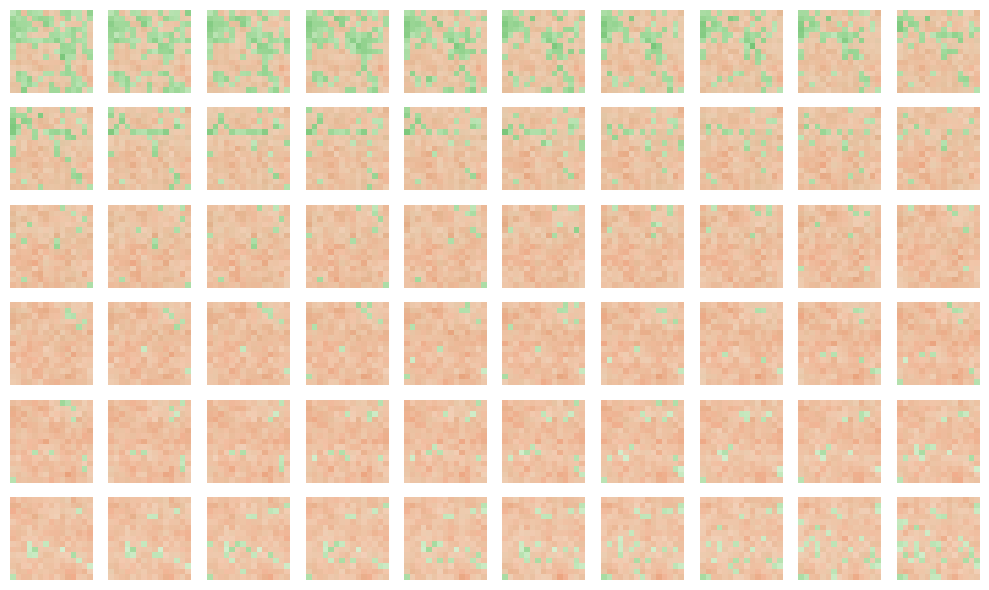

In [245]:
fig, axs = plt.subplots(6, 10, figsize=(10, 6))  # Explicit axes objects

for i in range(60):
    # Update vegetation and heat
    V = vegrowth(V)
    H = firespread(H, V)
    V = fireconsume(V,H)
    
    # Select subplot axis
    row = i // 10
    col = i % 10
    ax = axs[row, col]
    
    # Plot vegetation (green)
    ax.imshow(V, cmap="Greens", vmin=0, vmax=1)
    
    # Plot heat (red) with *current* H-dependent alpha
    ax.imshow(H, cmap="Reds", alpha=0.8*(H > 0.2), vmin=0, vmax=1)
    
    ax.axis('off')

plt.tight_layout()
plt.show()

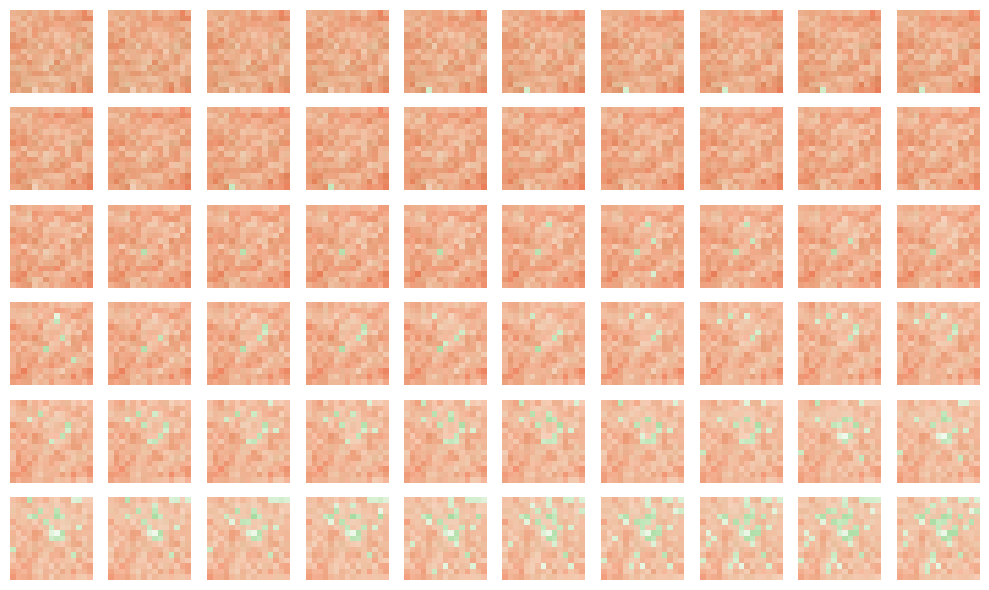

In [239]:
fig, axs = plt.subplots(6, 10, figsize=(10, 6))  # Explicit axes objects

for i in range(60):
    # Update vegetation and heat
    V = vegrowth(V)
    H = firespread(H, V)
    V = fireconsume(V,H)
    
    # Select subplot axis
    row = i // 10
    col = i % 10
    ax = axs[row, col]
    
    # Plot vegetation (green)
    ax.imshow(V, cmap="Greens", vmin=0, vmax=1)
    
    # Plot heat (red) with *current* H-dependent alpha
    ax.imshow(H, cmap="Reds", alpha=0.8*(H > 0.2), vmin=0, vmax=1)
    
    ax.axis('off')

plt.tight_layout()
plt.show()

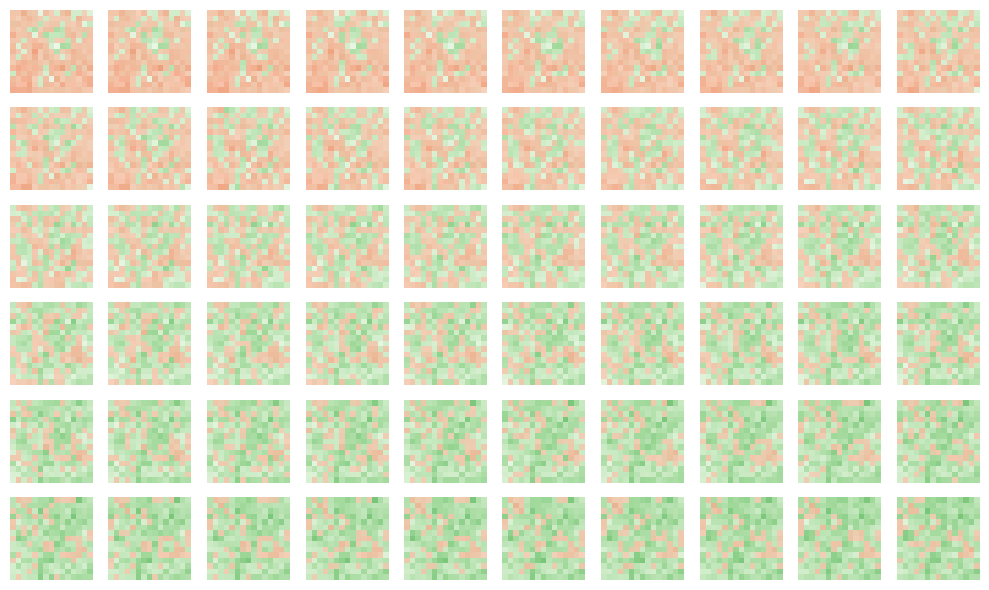

In [240]:
fig, axs = plt.subplots(6, 10, figsize=(10, 6))  # Explicit axes objects

for i in range(60):
    # Update vegetation and heat
    V = vegrowth(V)
    H = firespread(H, V)
    V = fireconsume(V,H)
    
    # Select subplot axis
    row = i // 10
    col = i % 10
    ax = axs[row, col]
    
    # Plot vegetation (green)
    ax.imshow(V, cmap="Greens", vmin=0, vmax=1)
    
    # Plot heat (red) with *current* H-dependent alpha
    ax.imshow(H, cmap="Reds", alpha=0.8*(H > 0.2), vmin=0, vmax=1)
    
    ax.axis('off')

plt.tight_layout()
plt.show()

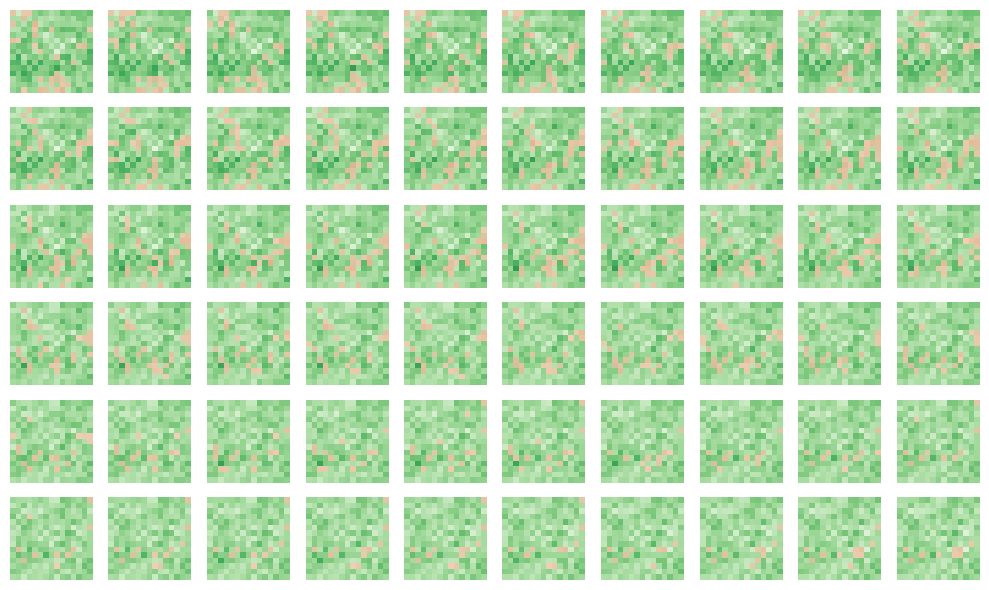

In [231]:
fig, axs = plt.subplots(6, 10, figsize=(10, 6))  # Explicit axes objects

for i in range(60):
    # Update vegetation and heat
    V = vegrowth(V)
    H = firespread(H, V)
    V = fireconsume(V,H)
    
    # Select subplot axis
    row = i // 10
    col = i % 10
    ax = axs[row, col]
    
    # Plot vegetation (green)
    ax.imshow(V, cmap="Greens", vmin=0, vmax=1)
    
    # Plot heat (red) with *current* H-dependent alpha
    ax.imshow(H, cmap="Reds", alpha=0.8*(H > 0.2), vmin=0, vmax=1)
    
    ax.axis('off')

plt.tight_layout()
plt.show()

### Visualisation above

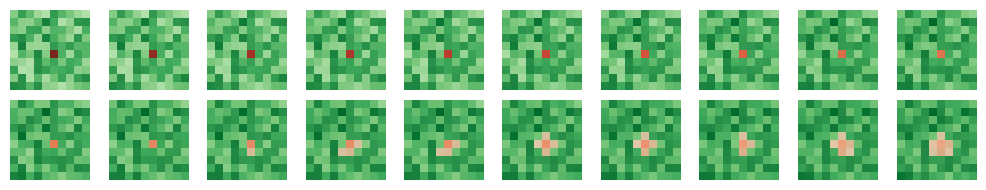

In [544]:
size = 10
a = 0.1 #Vegetation growth
b = 1.2 #Fire start senseitivity
c = 0.3 #Combustion rate
d = 0.4 #Fire decay
s = 0.01 #Noise scale
t = 0.2

V = np.random.rand(size, size)*0.5+0.3  # Vegetation
H = np.zeros((size, size))      # Heat
H[int(size/2), int(size/2)] = 1.0  # Initial fire

fig, axs = plt.subplots(2, 10, figsize=(10, 2))  # Explicit axes objects

for i in range(20):
    # Update vegetation and heat
    V = vegrowth(V)
    H = firespread(H, V)
    V = fireconsume(V,H)
    
    # Select subplot axis
    row = i // 10
    col = i % 10
    ax = axs[row, col]
    
    # Plot vegetation (green)
    ax.imshow(V, cmap="Greens", vmin=0, vmax=1)
    
    # Plot heat (red) with *current* H-dependent alpha
    ax.imshow(H, cmap="Reds", alpha=0.8*(H > 0.2), vmin=0, vmax=1)
    
    ax.axis('off')

plt.tight_layout()
plt.show()

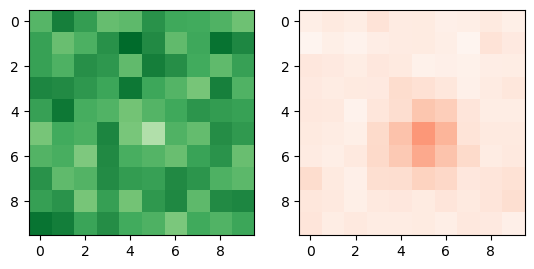

<function matplotlib.pyplot.plot(*args: 'float | ArrayLike | str', scalex: 'bool' = True, scaley: 'bool' = True, data=None, **kwargs) -> 'list[Line2D]'>

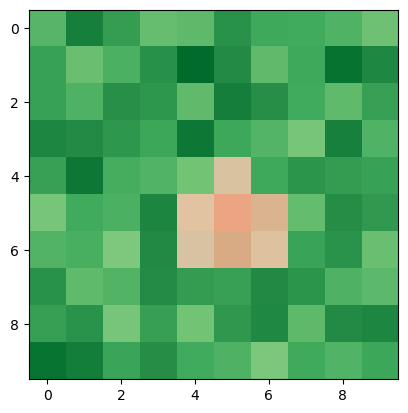

In [550]:
VBase = V
HBase = H
plt.subplot(1,2,1)
plt.imshow(VBase, cmap="Greens",vmin=0,vmax=1)
plt.subplot(1,2,2)
plt.imshow(HBase, cmap="Reds",vmin=0,vmax=1)
plt.show()

plt.imshow(VBase, cmap="Greens",vmin=0,vmax=1)
plt.imshow(HBase, cmap="Reds", alpha=0.8*(HBase > 0.2), vmin=0, vmax=1)
plt.plot

In [551]:
def predictout(VegBase,HeatBase,size,predl,a,b,c,d,s,t):
    Vpred = np.zeros((size,size,predl))
    Hpred = np.zeros((size,size,predl))

    V = vegrowth(VegBase)
    H = firespread(HeatBase, V)
    V = fireconsume(V,H)
    Vpred[:,:,0] = VegBase
    Hpred[:,:,0] = HeatBase
    # V = VegBase
    # H = HeatBase
    for i in range(predl-1):
        V = vegrowth(V)
        H = firespread(H, V)
        V = fireconsume(V,H)
        Vpred[:,:,i+1] = V
        Hpred[:,:,i+1] = H
    
    return Vpred,Hpred

In [555]:
def interveave(Veg,Heat,size,predl):
    Veg = Veg.reshape(size*size,predl).T
    Heat = Heat.reshape(size*size,predl).T
    combined = np.empty((predl, 2*size*size))
    combined[:,0::2] = Veg
    combined[:,1::2] = Heat
    return(combined)

def plotsequence(Veg,Heat,predl):
    fig, axs = plt.subplots(2, int(predl/2), figsize=(10, 2))  # Explicit axes objects

    for i in range(predl):

        row = i // 10
        col = i % 10
        ax = axs[row, col]
        
        # Plot vegetation (green)
        ax.imshow(Veg[:,:,i], cmap="Greens", vmin=0, vmax=1)
        
        # Plot heat (red) with *current* H-dependent alpha
        ax.imshow(Heat[:,:,i], cmap="Reds", alpha=0.8*(Heat[:,:,i] > 0.2), vmin=0, vmax=1)
        
        ax.axis('off')

    plt.tight_layout()
    plt.show()
    



In [300]:

a = 0.1 #a #0.1   Vegetation growth
b = 1.2# b# 1.2 #Fire start senseitivity
c = 0.3# c#0.3 #Combustion rate
d = 0.4#d#0.4 #Fire decay
s = 0.01#s#0.01 #Noise scale
t = 0.2#t#0.2
size = 10
predl =15

Vpred1,Hpred1 = predictout(VBase,HBase,size,predl,a,b,c,d,s,t)
full1 = interveave(Vpred1,Hpred1,size,predl)

In [553]:
import sigkernel
import torch

In [556]:
a = 0.1 #a #0.1   Vegetation growth
b = 1.2# b# 1.2 #Fire start senseitivity
c = 0.3# c#0.3 #Combustion rate
d = 0.4#d#0.4 #Fire decay
s = 0.01#s#0.01 #Noise scale
t = 0.2#t#0.2
size = 10
predl =20

Vpred1,Hpred1 = predictout(VBase,HBase,size,predl,a,b,c,d,s,t)
full1 = interveave(Vpred1,Hpred1,size,predl)
Vpred1,Hpred1 = predictout(VBase,HBase,size,predl,a,b,c,d,s,t)
full2 = interveave(Vpred1,Hpred1,size,predl)

full1 = np.expand_dims(full1,axis=0)
full1  = sigkernel.transform(full1, at=True)
full1 = torch.tensor(full1, device='cuda')
full2 = np.expand_dims(full2,axis=0)
full2  = sigkernel.transform(full2, at=True)
full2 = torch.tensor(full2, device='cuda') #dtype

static = sigkernel.RBFKernel(sigma=0.5)
sigker = sigkernel.SigKernel(static, 2)

K = sigker.compute_kernel(full1,full2)
print(K)


tensor([9.1980], device='cuda:0', dtype=torch.float64)


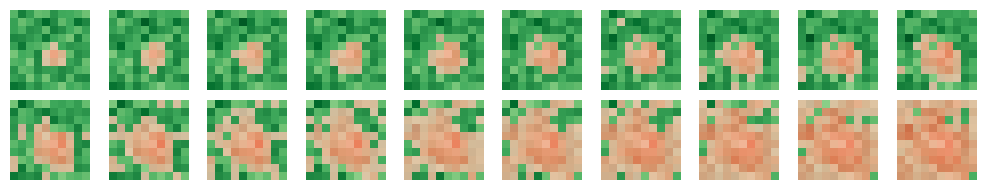

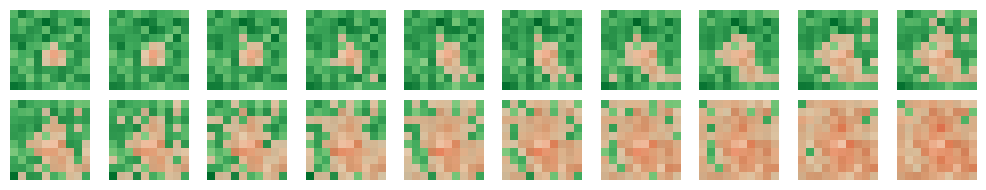

tensor([2.6706], device='cuda:0', dtype=torch.float64)


In [585]:
a = 0.1 #a #0.1   Vegetation growth
b = 1.2# b# 1.2 #Fire start senseitivity
c = 0.3# c#0.3 #Combustion rate
d = 0.4#d#0.4 #Fire decay
s = 0.02#s#0.01 #Noise scale
t = 0.2#t#0.2
size = 10
predl =20

Vpred1,Hpred1 = predictout(VBase,HBase,size,predl,a,b,c,d,s,t)
plotsequence(Vpred1,Hpred1,predl)
full1 = interveave(Vpred1,Hpred1,size,predl)
Vpred1,Hpred1 = predictout(VBase,HBase,size,predl,a,b,c,d,s+0.5,t)
plotsequence(Vpred1,Hpred1,predl)
full2 = interveave(Vpred1,Hpred1,size,predl)


full1 = np.expand_dims(full1,axis=0)
full1  = sigkernel.transform(full1, at=True)
full1 = torch.tensor(full1, device='cuda')
full2 = np.expand_dims(full2,axis=0)
full2  = sigkernel.transform(full2, at=True)
full2 = torch.tensor(full2, device='cuda') #dtype

static = sigkernel.RBFKernel(sigma=0.5)
sigker = sigkernel.SigKernel(static, 2)

K = sigker.compute_kernel(full1,full2)
print(K)


In [580]:
a = 0.1 #a #0.1   Vegetation growth
b = 1.2# b# 1.2 #Fire start senseitivity
c = 0.3# c#0.3 #Combustion rate
d = 0.4#d#0.4 #Fire decay
s = 0.02#s#0.01 #Noise scale
t = 0.2#t#0.2
size = 10
predl =20


for i in range(0,40):
    Vpred1,Hpred1 = predictout(VBase,HBase,size,predl,a,b,c,d,s,t)
    #plotsequence(Vpred1,Hpred1,predl)
    full1 = interveave(Vpred1,Hpred1,size,predl)/(i+1)
    Vpred1,Hpred1 = predictout(VBase,HBase,size,predl,a,b,c,d,s,t)
    #plotsequence(Vpred1,Hpred1,predl)
    full2 = interveave(Vpred1,Hpred1,size,predl)/(i+1)


    full1 = np.expand_dims(full1,axis=0)
    full1  = sigkernel.transform(full1, at=True)
    full1 = torch.tensor(full1, device='cuda')
    full2 = np.expand_dims(full2,axis=0)
    full2  = sigkernel.transform(full2, at=True)
    full2 = torch.tensor(full2, device='cuda') #dtype

    #static = sigkernel.RBFKernel(sigma=0.1)
    static = sigkernel.Linear_ID_Kernel()
    sigker = sigkernel.SigKernel(static, 2)

    K = sigker.compute_kernel(full1,full2)
    print(K)


tensor([39.8035], device='cuda:0', dtype=torch.float64)
tensor([7.1110], device='cuda:0', dtype=torch.float64)
tensor([3.6506], device='cuda:0', dtype=torch.float64)
tensor([3.0852], device='cuda:0', dtype=torch.float64)
tensor([2.6808], device='cuda:0', dtype=torch.float64)
tensor([2.6798], device='cuda:0', dtype=torch.float64)
tensor([2.5130], device='cuda:0', dtype=torch.float64)
tensor([2.4645], device='cuda:0', dtype=torch.float64)
tensor([2.4135], device='cuda:0', dtype=torch.float64)
tensor([2.4149], device='cuda:0', dtype=torch.float64)
tensor([2.3799], device='cuda:0', dtype=torch.float64)
tensor([2.3624], device='cuda:0', dtype=torch.float64)
tensor([2.3454], device='cuda:0', dtype=torch.float64)
tensor([2.3485], device='cuda:0', dtype=torch.float64)
tensor([2.3361], device='cuda:0', dtype=torch.float64)
tensor([2.3195], device='cuda:0', dtype=torch.float64)
tensor([2.3220], device='cuda:0', dtype=torch.float64)
tensor([2.3107], device='cuda:0', dtype=torch.float64)
tensor([2

In [303]:
full1.shape

(15, 200)

In [283]:
predl =15
Vpred1 = np.zeros((10,10,predl))
Hpred1 = np.zeros((10,10,predl))

a = a #0.1   Vegetation growth
b = b# 1.2 #Fire start senseitivity
c = c#0.3 #Combustion rate
d = d#0.4 #Fire decay
s = s#0.01 #Noise scale
t = t#0.2
V = vegrowth(VBase)
H = firespread(HBase, V)
V = fireconsume(V,H)
Vpred1[:,:,0] = V
Hpred1[:,:,0] = H
for i in range(predl-1):
    V = vegrowth(V)
    H = firespread(H, V)
    V = fireconsume(V,H)
    Vpred1[:,:,i+1] = V
    Hpred1[:,:,i+1] = H

In [ ]:
predl =15
Vpred2 = np.zeros((10,10,predl))
Hpred2 = np.zeros((10,10,predl))

a = a #0.1   Vegetation growth
b = b# 1.2 #Fire start senseitivity
c = c#0.3 #Combustion rate
d = d#0.4 #Fire decay
s = s#0.01 #Noise scale
t = t#0.2
V = vegrowth(VBase)
H = firespread(HBase, V)
V = fireconsume(V,H)
Vpred2[:,:,0] = V
Hpred2[:,:,0] = H
for i in range(predl-1):
    V = vegrowth(V)
    H = firespread(H, V)
    V = fireconsume(V,H)
    Vpred2[:,:,i+1] = V
    Hpred2[:,:,i+1] = H

(10, 10, 15)

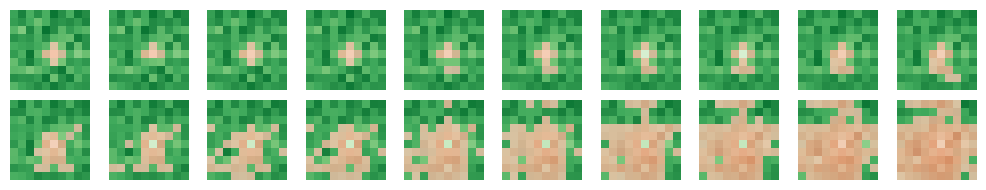

In [259]:
fig, axs = plt.subplots(2, 10, figsize=(10, 2))  # Explicit axes objects

for i in range(20):
    # Update vegetation and heat
    V = vegrowth(V)
    H = firespread(H, V)
    V = fireconsume(V,H)
    
    # Select subplot axis
    row = i // 10
    col = i % 10
    ax = axs[row, col]
    
    # Plot vegetation (green)
    ax.imshow(V, cmap="Greens", vmin=0, vmax=1)
    
    # Plot heat (red) with *current* H-dependent alpha
    ax.imshow(H, cmap="Reds", alpha=0.8*(H > 0.2), vmin=0, vmax=1)
    
    ax.axis('off')

plt.tight_layout()
plt.show()